<a href="https://colab.research.google.com/github/HumzAIqbal67/TwitterSentimentNNprj/blob/main/TweetSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install joblib

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import itertools

import tensorflow as tf
import tensorflow_hub as hub

In [5]:
df = pd.read_csv("CyberBullying-Comments-Dataset.csv",usecols=['Text', 'CB_Label'])

In [6]:
df.head()

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


In [7]:
df = df.dropna(subset= ["Text", "CB_Label"])

(array([5550.,    0., 5550.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

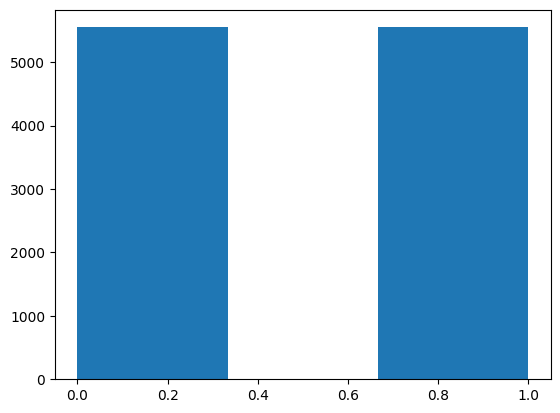

In [8]:
plt.hist(df.CB_Label, bins = 3)

In [9]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [10]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('CB_Label')
  df = df["Text"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [11]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [12]:
list(valid_data)[0]

(<tf.Tensor: shape=(32,), dtype=string, numpy=
 array([b'  hahaha hmmm im not surreee', b'  An eagle definantly.',
        b'"You\'re a dim-wit."',
        b'"lol you act like you have been watching basketball forever, its only ben 8 years moron\\n"',
        b'ass balls... lmfao.',
        b'45 windows and only 12 open and about 30 people on break I mean I want 23 a hour to do not a damn thing',
        b'I hate .... you .... zzzzzzzz',
        b"I hate that I couldn't guess MJ  that songs an obvious classic. Guess I need to take some time and listen to the 70s groove.",
        b'"That comment made zero sense. \\\\n\\\\nNice try, retard. Get the fuck out of here. Nobody knows who the fuck you are."',
        b'"You can\'t see it because you\'re a clueless idiot. Show me how he is helping the middle class you stupid Obama semen slurper"',
        b'"bettynm\\xa0It\'s too bad your not one of the idiots who can read as he\'s said it\'s hidden and not buried. As as outsider to your area,

In [13]:
list(test_data)[0]

(<tf.Tensor: shape=(32,), dtype=string, numpy=
 array([b"He's an asshole. I'd fucking bean him  for love of the game. Not starring Kevin Costner.",
        b' Do you consider yourself a good dancer?',
        b"that sucks.  I do both at my work  which is a pain the rear-end too  because everyone thinks they're designers ;)",
        b" Yes indeed and french vanilla ice cream in it.  It's horribly calorie and fat laden but worth it!",
        b"if you can get me a signed copy of Jordan's book....we'll pull some qoutes during shows.  That guy kicks ass muchos muchos  wow",
        b'no fucking crazy josh!!!!', b'why do i look so fat?',
        b'AND DAMN I JUST LOST /AGAIN/.',
        b" GOOD! Now u can bring ur happy lil' ass over here & help me finish hanging this garland.  ;-)",
        b'Sorry to hear that  lol. You are going to hate the keyboard for twitter & texting.',
        b'52nd street. fuck. that. good album. but fuck. that.',
        b'  okay :o',
        b'Gearhound would b

In [14]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [15]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(32, 50), dtype=float32, numpy=
array([[ 0.33000126, -0.03661346, -0.22715333, ...,  0.10008289,
         0.08923772, -0.10006213],
       [ 0.42603484, -0.36284736, -0.14301658, ..., -0.02077007,
         0.00055379,  0.07286985],
       [ 0.42878076, -0.20548125, -0.14293729, ...,  0.04205001,
         0.0179269 ,  0.07592986],
       ...,
       [ 0.32737395,  0.00773014,  0.01509081, ...,  0.19921872,
         0.37312034, -0.19177607],
       [ 0.14249891, -0.10297713, -0.17558464, ...,  0.00831658,
         0.21410035, -0.10082401],
       [ 0.53921753, -0.14041907, -0.32393223, ..., -0.2198629 ,
        -0.00822764,  0.00500881]], dtype=float32)>

In [16]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) #helps generalize
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.evaluate(train_data)

278/278 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.4796


[0.6962130069732666, 0.4796171188354492]

In [19]:
model.evaluate(valid_data)

35/35 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4820


[0.6963114142417908, 0.4819819927215576]

In [20]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
278/278 [==============================] - 343s 1s/step - loss: 0.6847 - accuracy: 0.5385 - val_loss: 0.6361 - val_accuracy: 0.6667
Epoch 2/5
278/278 [==============================] - 371s 1s/step - loss: 0.5823 - accuracy: 0.7001 - val_loss: 0.5285 - val_accuracy: 0.7414
Epoch 3/5
278/278 [==============================] - 338s 1s/step - loss: 0.4597 - accuracy: 0.8006 - val_loss: 0.5262 - val_accuracy: 0.7432
Epoch 4/5
278/278 [==============================] - 358s 1s/step - loss: 0.3564 - accuracy: 0.8537 - val_loss: 0.5849 - val_accuracy: 0.7369
Epoch 5/5
278/278 [==============================] - 358s 1s/step - loss: 0.2618 - accuracy: 0.8964 - val_loss: 0.7359 - val_accuracy: 0.7324


In [27]:
joblib.dump(model , 'model_jlib')

['model_jlib']

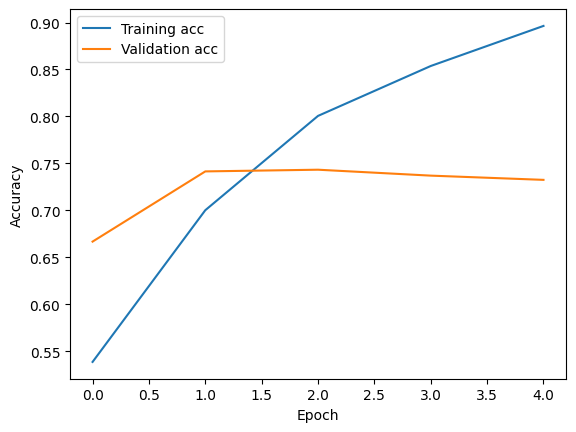

In [21]:
plt.plot(history.history['accuracy'],label = "Training acc")
plt.plot(history.history['val_accuracy'],label = "Validation acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

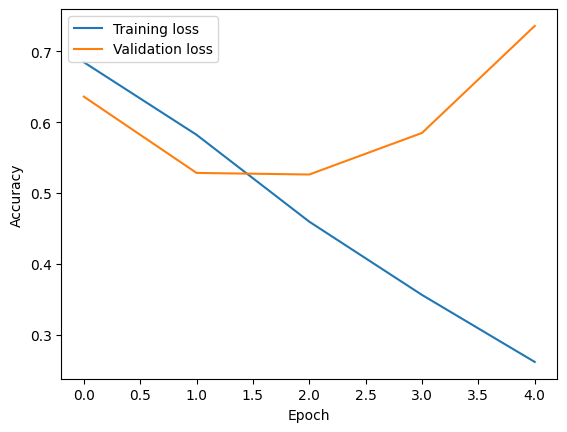

In [31]:
plt.plot(history.history['loss'],label = "Training loss")
plt.plot(history.history['val_loss'],label = "Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
model.evaluate(test_data)

87/87 [==============================] - 26s 294ms/step - loss: 0.7681 - accuracy: 0.6796


[0.7681056261062622, 0.6796396374702454]

In [41]:
train, val, test = np.split(df.sample(frac=1), [int(0.5*len(df)), int(0.75*len(df))])

In [42]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [43]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [44]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) #helps generalize
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) #helps generalize
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [46]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
174/174 [==============================] - 222s 1s/step - loss: 0.6922 - accuracy: 0.5295 - val_loss: 0.6734 - val_accuracy: 0.6328
Epoch 2/5
174/174 [==============================] - 225s 1s/step - loss: 0.6393 - accuracy: 0.6490 - val_loss: 0.5910 - val_accuracy: 0.7027
Epoch 3/5
174/174 [==============================] - 225s 1s/step - loss: 0.5204 - accuracy: 0.7591 - val_loss: 0.5448 - val_accuracy: 0.7186
Epoch 4/5
174/174 [==============================] - 225s 1s/step - loss: 0.3948 - accuracy: 0.8391 - val_loss: 0.5782 - val_accuracy: 0.7085
Epoch 5/5
174/174 [==============================] - 226s 1s/step - loss: 0.2827 - accuracy: 0.8919 - val_loss: 0.7106 - val_accuracy: 0.7023


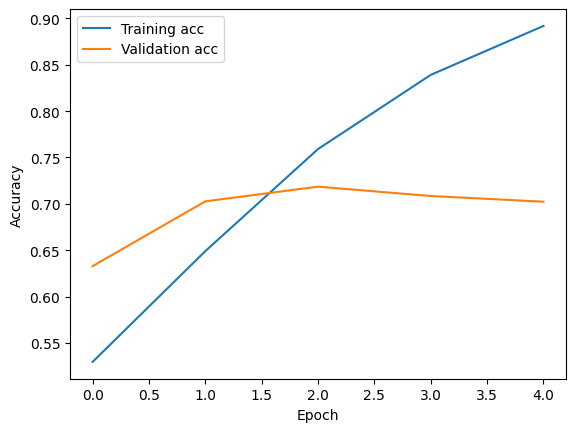

In [48]:
plt.plot(history.history['accuracy'],label = "Training acc")
plt.plot(history.history['val_accuracy'],label = "Validation acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

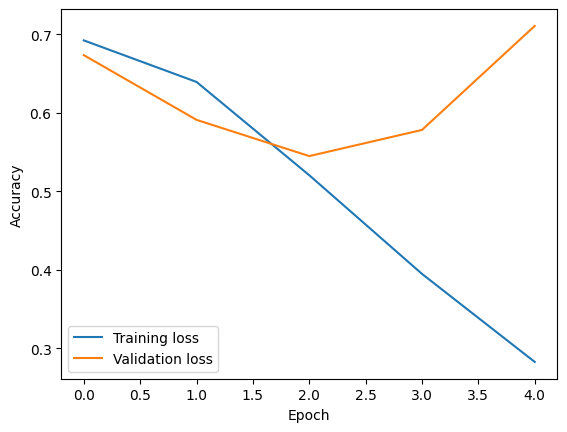

In [47]:
plt.plot(history.history['loss'],label = "Training loss")
plt.plot(history.history['val_loss'],label = "Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [50]:
model.evaluate(test_data)

87/87 [==============================] - 16s 183ms/step - loss: 0.7681 - accuracy: 0.6796


[0.7681054472923279, 0.6796396374702454]

In [60]:
minimum_nodes, maximum_nodes = 8, 32
nodess = 8
nodeops = list(range(
    minimum_nodes,
    maximum_nodes + 1,
    nodess
))
nodeops

[8, 16, 24, 32]

In [70]:
def get_models(numLays: int,
               minNodes: int,
               maxNodes: int,
               nodeSS: int,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:

    node_options = list(range(minNodes, maxNodes + 1, nodeSS))
    lp = [node_options] * numLays
    lnp = list(itertools.product(*lp))

    models = []
    for permutation in lnp:
        model = tf.keras.Sequential()
        model.add(hub_layer)
        name = ''

        for nl in permutation:
            model.add(tf.keras.layers.Dense(nl, activation=hidden_layer_activation))
            name += f'dense{nl}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = name[:-1]
        models.append(model)

    return models

In [82]:
all_models = get_models(
    numLays=2,
    minNodes=16,
    maxNodes=32,
    nodeSS=16,
)

In [83]:
print(f'#Models = {len(all_models)}')
print()

for model in all_models:
    print(model.name)

#Models = 4

dense16_dense16
dense16_dense32
dense32_dense16
dense32_dense32


In [84]:
from keras.src.metrics import accuracy
def optimize(models: list,
             trd: tf.data,
             vd: tf.data,
             ted: tf.data) -> pd.DataFrame:

    # We'll store the results here
    results = []

    def train(model: tf.keras.Sequential) -> dict:
        # Change this however you want
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

        # Train the model
        history = model.fit(trd, epochs=3, validation_data=vd)

        # Make predictions on the test set
        loosse, auc = model.evaluate(ted)

        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            'test_accuracy': auc,
            'his_accuracy': history.history['accuracy'],
            'his_los': history.history['val_accuracy'],
            'his_vaccuracy': history.history['loss'],
            'his_vlos': history.history['val_loss']
        }

    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')

    return pd.DataFrame(results)

In [85]:
optimization_results = optimize(
    models=all_models,
    trd= train_data,
    vd= valid_data,
    ted= test_data
)

dense16_dense16 ... Epoch 1/3
174/174 [==============================] - 221s 1s/step - loss: 0.4911 - accuracy: 0.7877 - val_loss: 0.6077 - val_accuracy: 0.7085
Epoch 2/3
174/174 [==============================] - 231s 1s/step - loss: 0.1845 - accuracy: 0.9346 - val_loss: 0.7887 - val_accuracy: 0.6944
Epoch 3/3
87/87 [==============================] - 14s 164ms/step - loss: 1.0351 - accuracy: 0.6638
dense16_dense32 ... Epoch 1/3
174/174 [==============================] - 222s 1s/step - loss: 0.3421 - accuracy: 0.9184 - val_loss: 0.7845 - val_accuracy: 0.6977
Epoch 2/3
174/174 [==============================] - 227s 1s/step - loss: 0.0744 - accuracy: 0.9768 - val_loss: 1.0861 - val_accuracy: 0.6836
Epoch 3/3
87/87 [==============================] - 15s 174ms/step - loss: 1.3999 - accuracy: 0.6638
dense32_dense16 ... Epoch 1/3
174/174 [==============================] - 229s 1s/step - loss: 0.2762 - accuracy: 0.9362 - val_loss: 0.9226 - val_accuracy: 0.6847
Epoch 2/3
174/174 [===========